# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Defining Mean Parameters

In [3]:
eps = 0.005 # convergence factor

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
false_dens = 1.0/6.0
lvl_dens = [(1-eps)/4.3166, eps/4.3166]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.Spingroup.zip(l, j)
reaction2 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

# 1 Spingroup Case:
SGs = TAZ.Spingroup.zip(l[:1], j[:1])
reaction1 = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens[:1], gn2m=gn2m[:1], nDOF=dfn[:1], gg2m=gg2m[:1], gDOF=dfg[:1], spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction1)
distributions = reaction1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_1 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Creating ENCORE pipeline.
Finished ENCORE initialization.


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, reaction2)
distributions = reaction2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction1.EB, distributions, reaction1.false_dens, Prior, TPPrior, verbose=True)
Posterior_2 = runMaster.WigBayes()

Finding level-spacing probabilities for group 0.
Finding level-spacing probabilities for group 1.
Creating ENCORE pipeline.
Finished ENCORE initialization.


### Comparison

Average Error for True Probability  = 0.00083
Average Error for False Probability = 0.00215



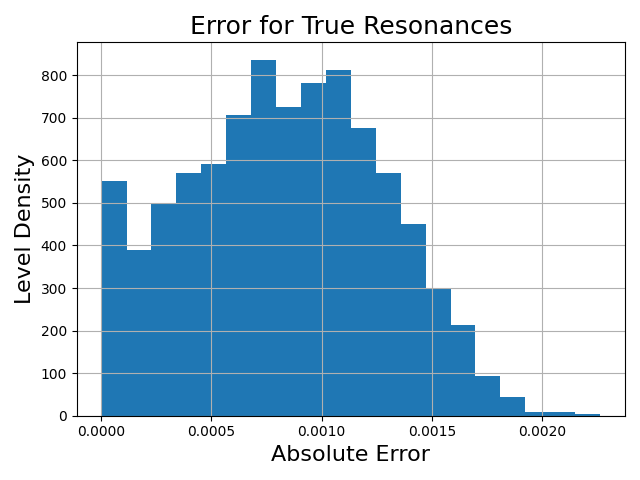

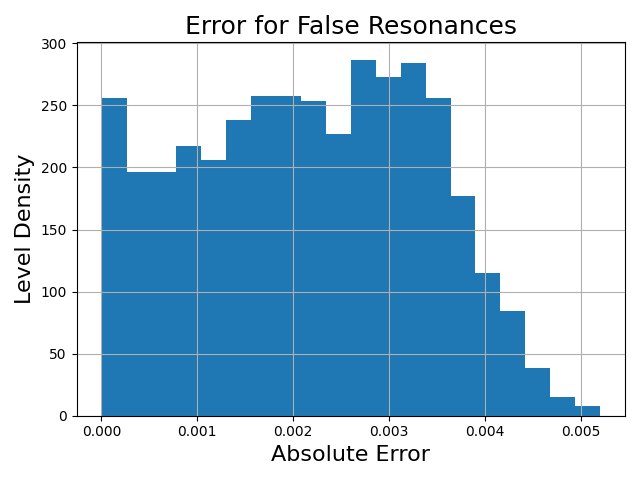

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.592173 0.591374]
 [0.435354 0.435702]
 [0.407579 0.406312]
 [0.434487 0.433613]
 [0.647376 0.646126]
 [0.805451 0.804786]
 [0.497665 0.497427]
 [0.492363 0.491304]
 [0.727242 0.726061]
 ...
 [0.538289 0.536799]
 [0.449707 0.449297]
 [0.528303 0.528226]
 [0.524023 0.522974]
 [0.505383 0.504447]
 [0.428085 0.42751 ]
 [0.431504 0.431535]
 [0.598004 0.596587]
 [0.569774 0.568261]]

False Spingroup Posterior:
[[0.407827 0.406379]
 [0.564646 0.562042]
 [0.592421 0.589322]
 [0.565513 0.562171]
 [0.352624 0.351054]
 [0.194549 0.193985]
 [0.502335 0.499828]
 [0.507637 0.505114]
 [0.272758 0.271877]
 ...
 [0.461711 0.459596]
 [0.550293 0.547408]
 [0.471697 0.469658]
 [0.475977 0.473598]
 [0.494617 0.492039]
 [0.571915 0.568822]
 [0.568496 0.56531 ]
 [0.401996 0.400258]
 [0.430226 0.428413]]
